Now, it's time to have fun!

In [66]:
# invite people for kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [67]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [68]:
# plt.style.use( 'classic')

In [69]:
# check the decoration
df_train = pd.read_csv('house_train.csv')

In [70]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 2. First things first: analysing 'SalePrice'

In [71]:
# Descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

'Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know... like, you in the beach... or maybe a selfie in the gym?'



<Axes: xlabel='SalePrice', ylabel='Density'>

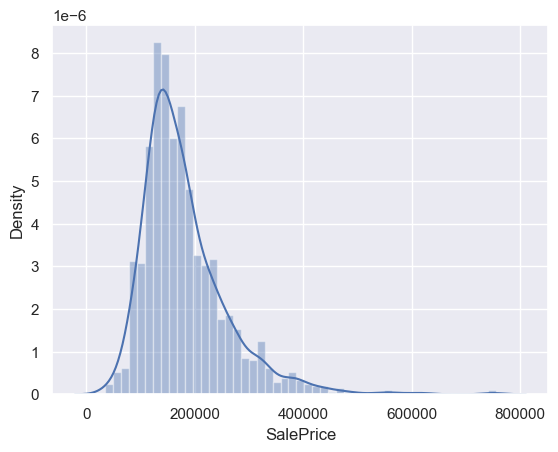

In [72]:
# histogram
sns.distplot(df_train['SalePrice'])

'Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you:
- Deviate from normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

This is getting interesting! 'SalePrice', could you give me your body measures?'



In [73]:
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f'% df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


##### Relationship with numerical variables

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

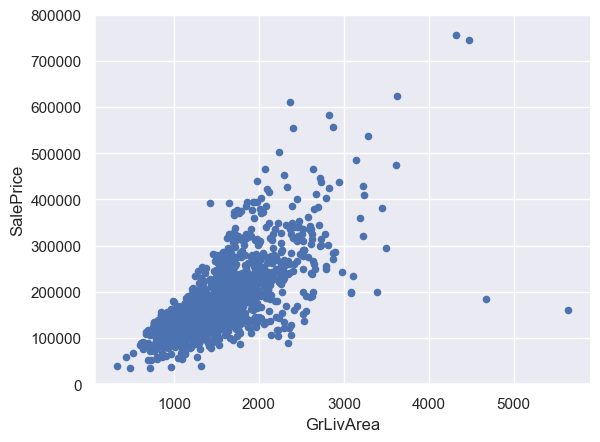

In [74]:
# scatter plot grlivarea/saleprice
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

Hmmm... It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.

And what about 'TotalBsmtSF'?

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

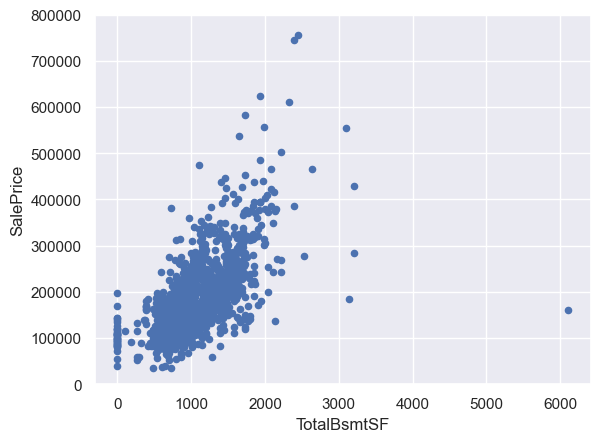

In [75]:
# scatter plot totalbsmtsf/saleprice
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

TotalBsmtSF' is also a great friend of 'SalePrice' but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes 'TotalBsmtSF' closes in itself and gives zero credit to 'SalePrice'.

##### Relationship with categorical variables

(np.float64(-0.5), np.float64(9.5), np.float64(0.0), np.float64(800000.0))

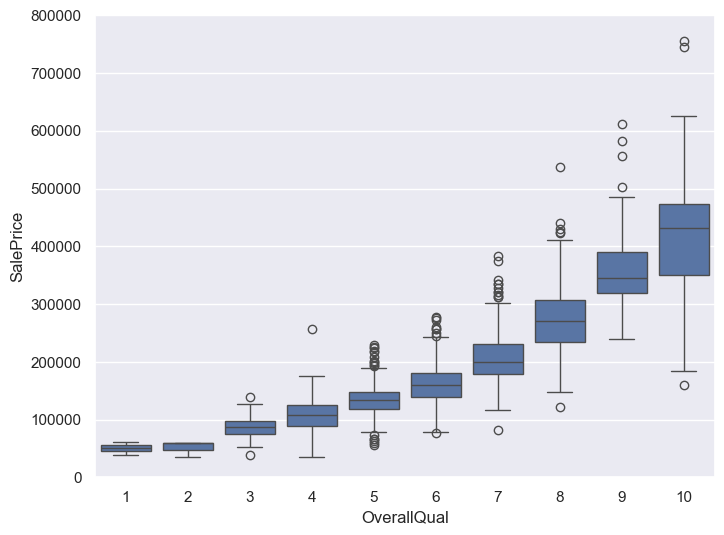

In [76]:
# box plot overallqual/saleprice
data = pd.concat([df_train['SalePrice'], df_train['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(data=data, x='OverallQual', y='SalePrice')
fig.axis(ymin=0, ymax=800000)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111],
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0,

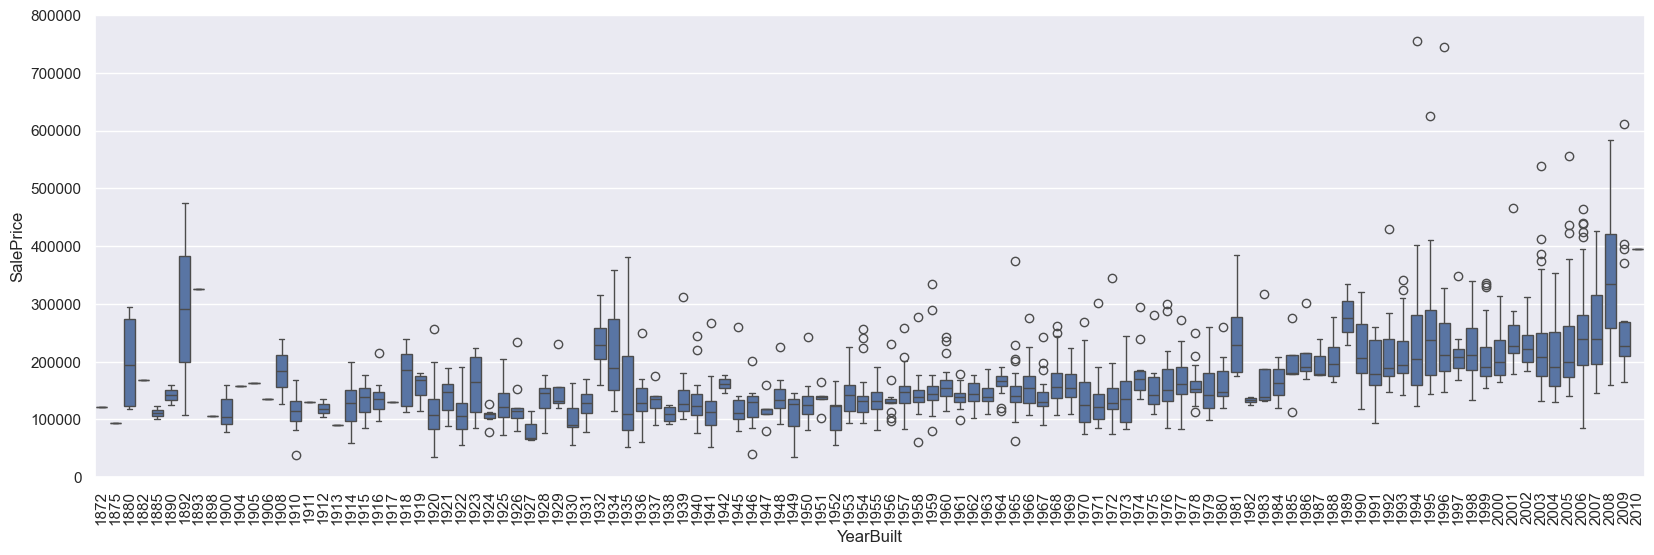

In [77]:
# box plot yearbuilt/saleprice
data = pd.concat([df_train['SalePrice'], df_train['YearBuilt']], axis=1)
plt.figure(figsize=(20,6))
fig = sns.boxplot(data=data, x='YearBuilt', y='SalePrice')
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

Although it's not a strong tendency, I'd say that 'SalePrice' is more prone to spend more money in new stuff than in old relics.

Note: we don't know if 'SalePrice' is in constant prices. Constant prices try to remove the effect of inflation. If 'SalePrice' is not in constant prices, it should be, so than prices are comparable over the years.


#### In summary
Stories aside, we can conclude that:

- 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.

- 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.
We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

To explore the universe, we will start with some practical recipes to make sense of our 'plasma soup':

- Correlation matrix (heatmap style).
- 'SalePrice' correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables (move like Jagger style).

##### Correlation matrix (heatmap style).

<Axes: >

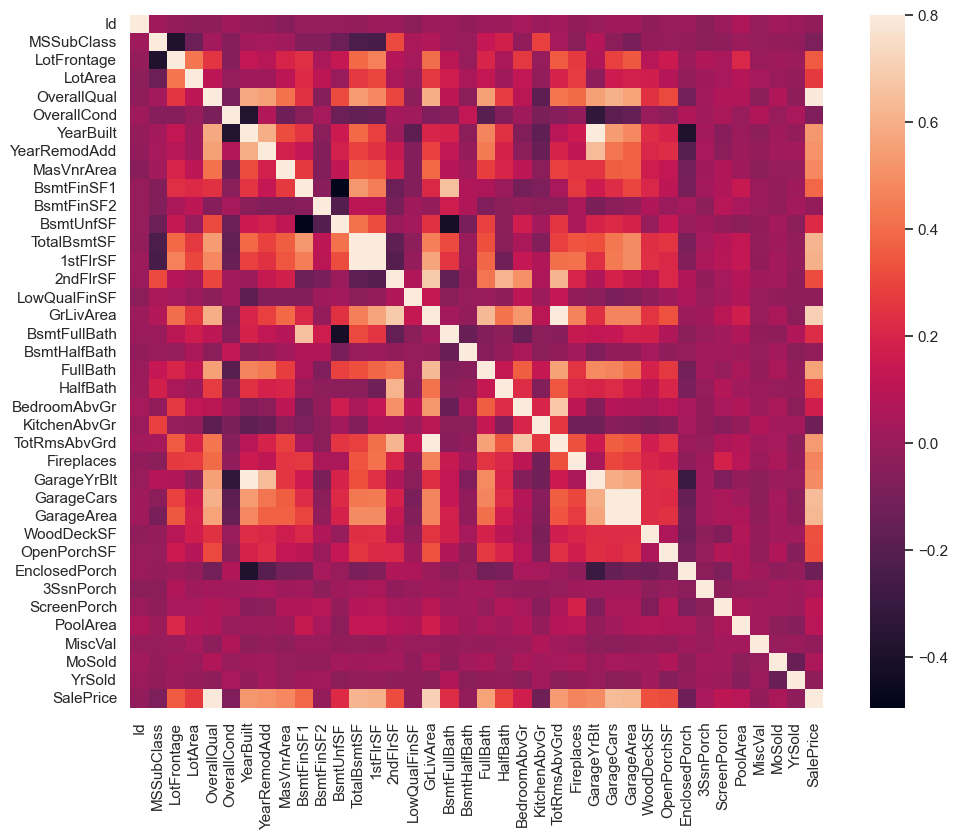

In [78]:
# Correlation matrix
corrmat = df_train.corr(numeric_only=True)
plt.figure(figsize=(12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

##### 'SalePrice' correlation matrix (zoomed heatmap style)


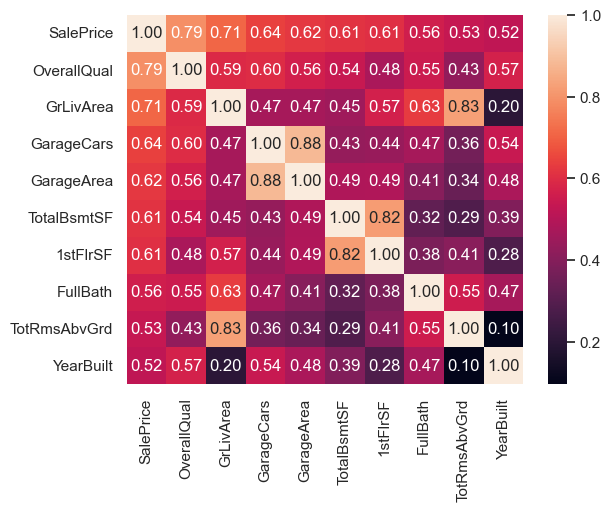

In [79]:
# saleprice correlation matix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set_theme(font_scale=1)
hm = sns.heatmap(cm, xticklabels=cols.values, yticklabels=cols.values, annot=True, fmt='.2f')


According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. Check!

- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

- 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right (re-read 'So... What can we expect?').

- 'FullBath'?? Really

- 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. Is this dataset from Chernobyl?

- Ah... 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'. Honestly, it scares me to think about 'YearBuilt' because I start feeling that we should do a little bit of time-series analysis to get this right. I'll leave this as a homework for you.


Let's proceed to the scatter plots.

##### Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)


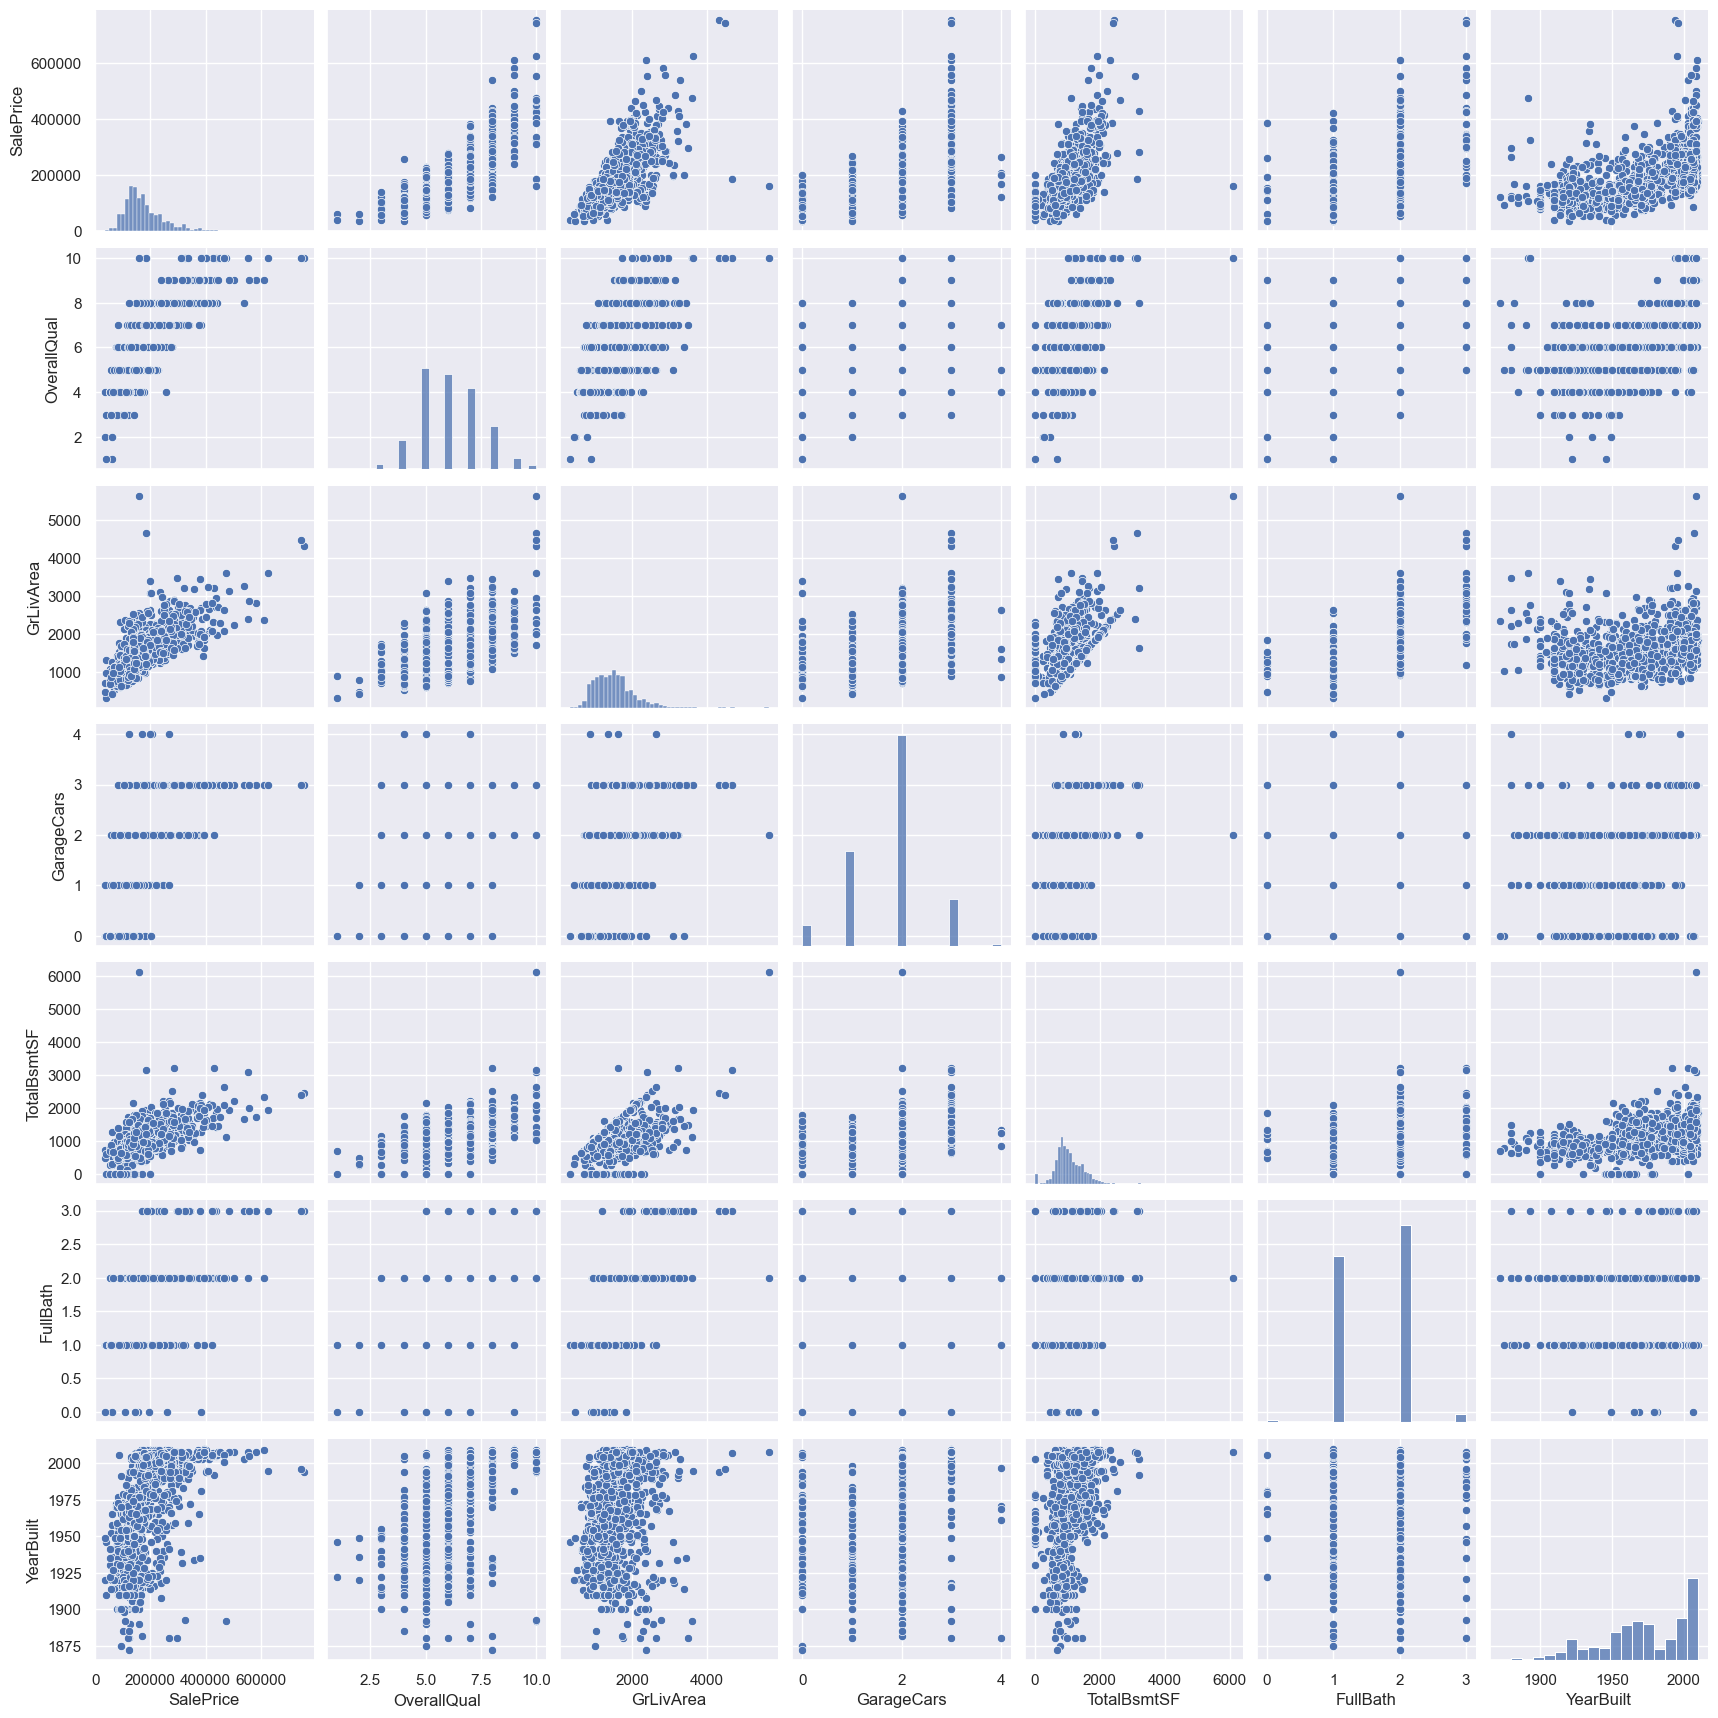

In [80]:
# scatterplot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols])

##### Ok, enough of Rorschach test for now. Let's move forward to what's missing: missing data!


#### 4. Missing data
Important questions when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?


The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [81]:
# missing data
pd.set_option('display.min_rows', None)

total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageFinish,81,0.055479
GarageType,81,0.055479


Let's analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. The point is: will we miss this data? `I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?).` Moreover, looking closer at the variables, we could say that variables like 'PoolQC', 'MiscFeature' and 'FireplaceQu' are strong candidates for outliers, so we'll be happy to delete them.

In [82]:
# dealing with missing data
# df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, axis=1)
df_train.isnull().sum().max()
# df_train = df_train.drop(df_train.loc['Electrical'].isnull().index)

np.int64(1453)

### Out liars!
Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.



#### Univariate Analysis

The primary concern here is to establish a threshold that defines an observation as an outlier. To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [83]:
# standardizing data
saleprice_array = df_train['SalePrice'].values.reshape(-1, 1)
scaler = StandardScaler()
saleprice_scaled = scaler.fit_transform(saleprice_array)
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution')
print(low_range)
print('\n outer range (high) of the distribution')
print(high_range)

outer range (low) of the distribution
[[-1.83870376]
 [-1.83352844]
 [-1.80092766]
 [-1.78329881]
 [-1.77448439]
 [-1.62337999]
 [-1.61708398]
 [-1.58560389]
 [-1.58560389]
 [-1.5731    ]]

 outer range (high) of the distribution
[[3.82897043]
 [4.04098249]
 [4.49634819]
 [4.71041276]
 [4.73032076]
 [5.06214602]
 [5.42383959]
 [5.59185509]
 [7.10289909]
 [7.22881942]]


#### Bivariate Analysis

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

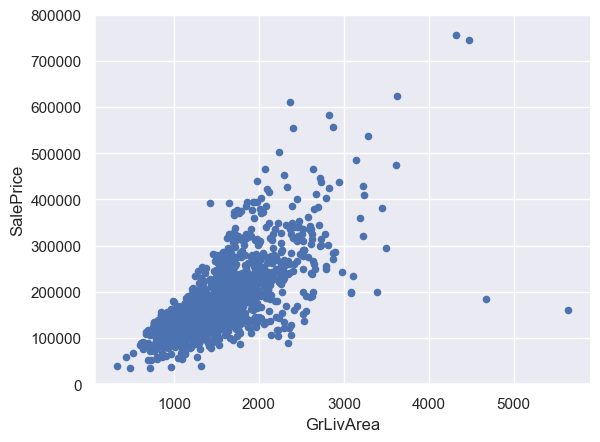

In [84]:
# bivariate analysis saleprice/grlivarea
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

What has been revealed:

- The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.

- The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [85]:
# deleting points
df_train.sort_values(by='GrLivArea', ascending=False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == '1299'].index)
df_train = df_train.drop(df_train[df_train['Id'] == '524'].index)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

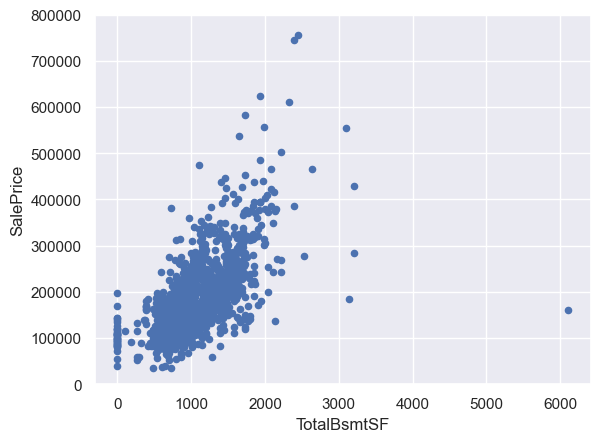

In [86]:
# bivariate analysis saleprice/grlivarea
data = pd.concat([df_train['SalePrice'], df_train['TotalBsmtSF']], axis=1)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000))

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

#####  In the search for normality


The point here is to test 'SalePrice' in a very lean way. We'll do this paying attention to:

Histogram - Kurtosis and skewness.
Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (np.float64(74160.16474519414),
  np.float64(180921.19589041095),
  np.float64(0.9319665641512989)))

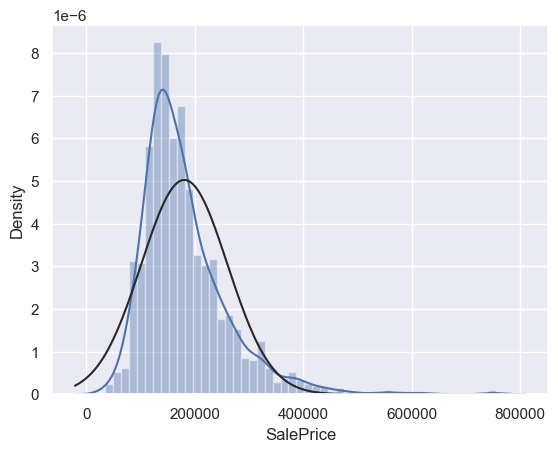

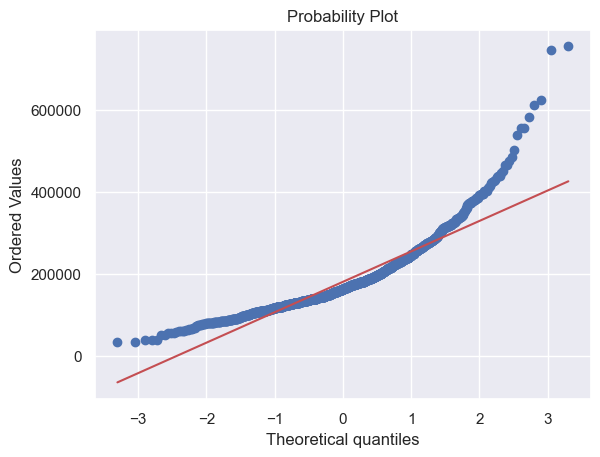

In [87]:
# histogram and normal distribution plot
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. `A simple data transformation can solve the problem.` This is one of the awesome things you can learn in statistical books: in case of positive skewness, `log transformations` usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

Avada kedavra!

In [88]:
# applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

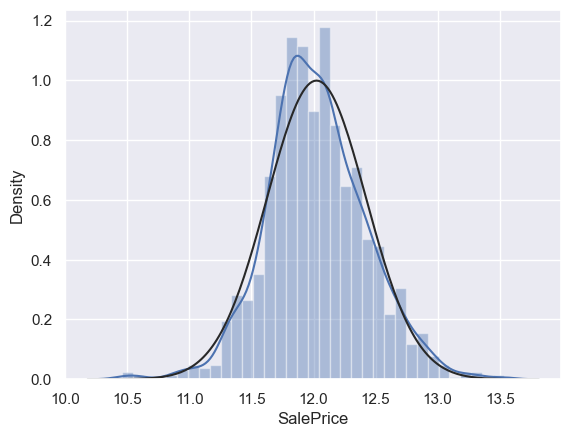

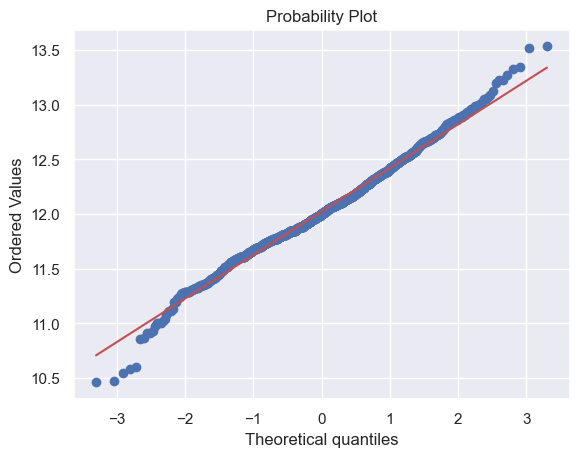

In [89]:
# after applying log transformation on saleprice column, it has became transformed 
# histogram and probability plot of transformed saleprice
sns.distplot(df_train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Done! Let's check what's going on with 'GrLivArea'.

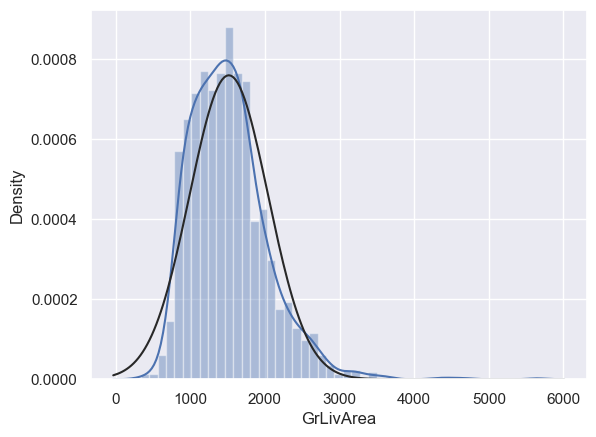

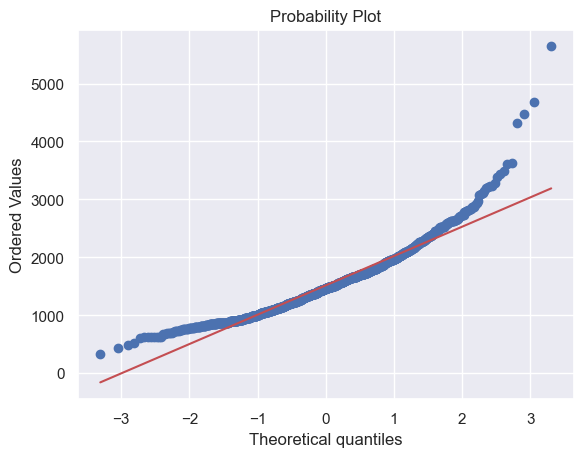

In [90]:
# histogram and normal probability plot on grlivarea
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Tastes like skewness... Avada kedavra!



In [91]:
# data transformation on GrLivArea
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

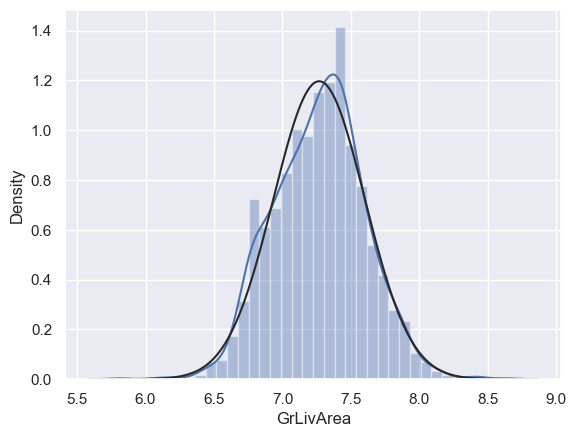

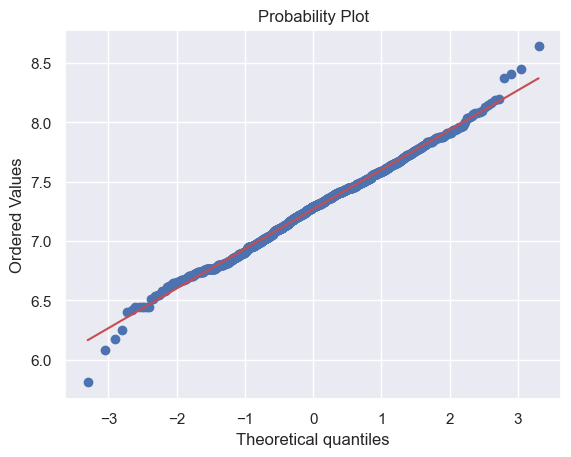

In [92]:
# after transformation
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

Next, please...

Ok, now we are dealing with the big boss. What do we have here?

- Something that, in general, presents skewness.

- A significant number of observations with value zero (houses without basement).

- A big problem because the value zero doesn't allow us to do log transformations.
To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering'.

In [93]:
# create column for new variable (one is enough because it's a binary categorical feature)
# if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [94]:
# transform data
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

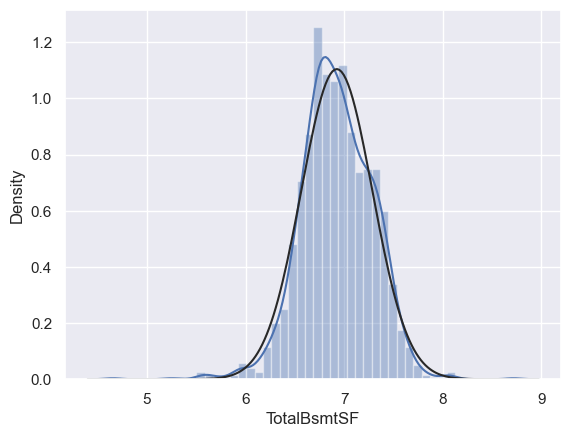

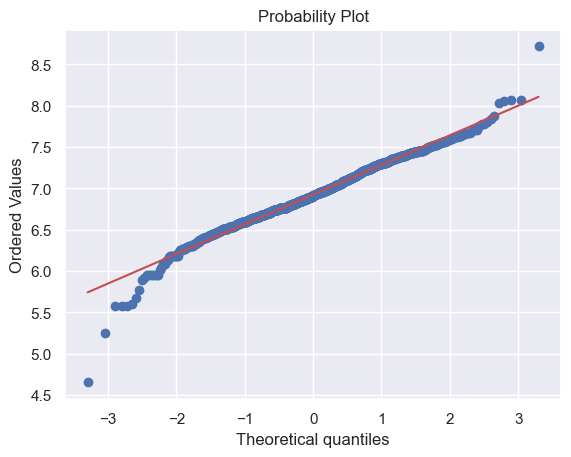

In [95]:
# histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot=plt)

In the search for writing 'homoscedasticity' right at the first attempt


The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

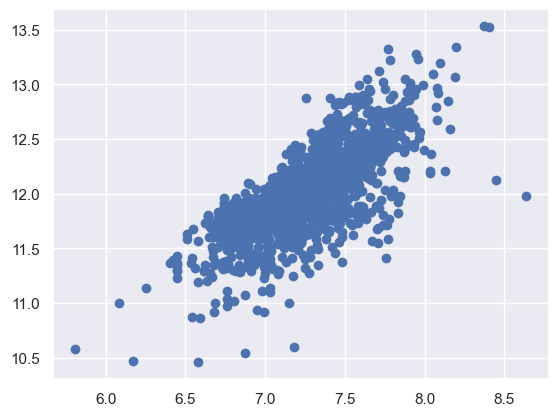

In [96]:
# scatter plot
plt.scatter(x=df_train['GrLivArea'], y=df_train['SalePrice'])

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

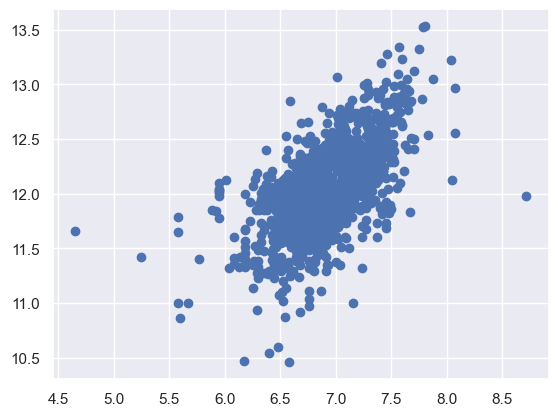

In [97]:
# scatter plot
plt.scatter(x=df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], y=df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'])

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!



#### Last but not the least, dummy variables¶
Easy mode.

In [98]:
# convert categorical variables into dummy
df_train = pd.get_dummies(df_train)

#### Conclusion

That's it! We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed by Hair et al. (2013). We philosophied about the variables, we analysed 'SalePrice' alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorial variables into dummy variables. That's a lot of work that Python helped us make easier.

But the quest is not over. Remember that our story stopped in the Facebook research. Now it's time to give a call to 'SalePrice' and invite her to dinner. Try to predict her behaviour. Do you think she's a girl that enjoys `regularized linear regression approaches?` Or do you think she prefers `ensemble methods?` Or maybe something else?



`It's up to you to find out.`